SUPPORT VECTOR MACHINE
Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset
Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.

Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.

Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.head()
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
#Drop Unnamed: 0 if it’s just an index
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


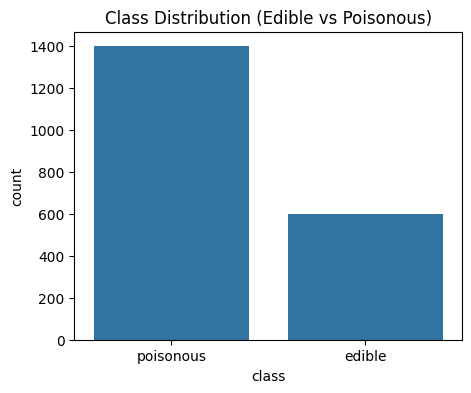

In [7]:
# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='class')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

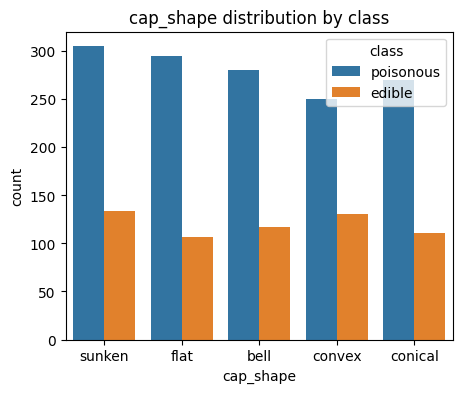

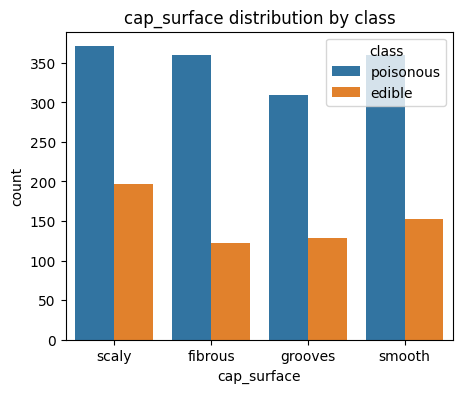

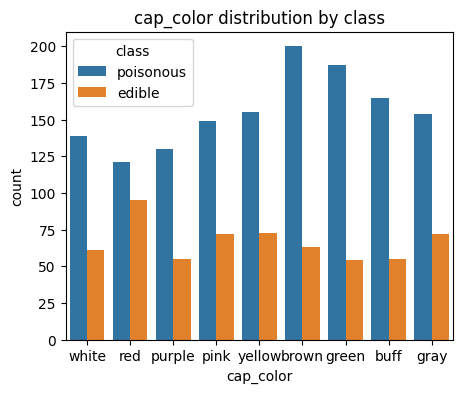

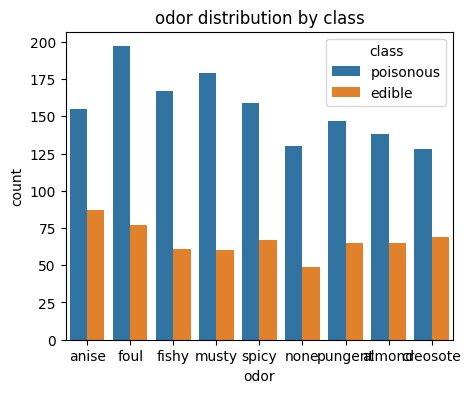

In [8]:
# Feature distribution example
for col in ['cap_shape', 'cap_surface', 'cap_color', 'odor']:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f"{col} distribution by class")
    plt.show()

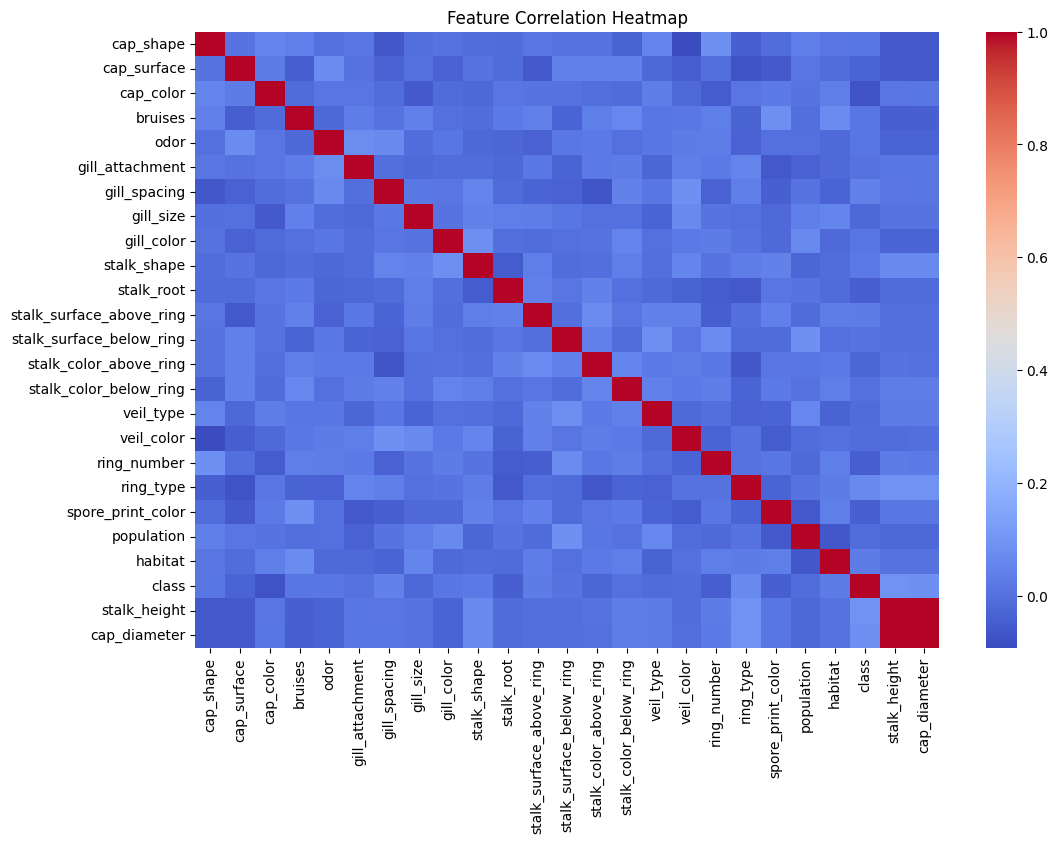

In [9]:
# Correlation (encoded for temporary visualization)
encoded_df = df.apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(12,8))
sns.heatmap(encoded_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Task 2: Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [12]:
# Features and target
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (1600, 24), Test size: (400, 24)


Task 3: Data Visualization

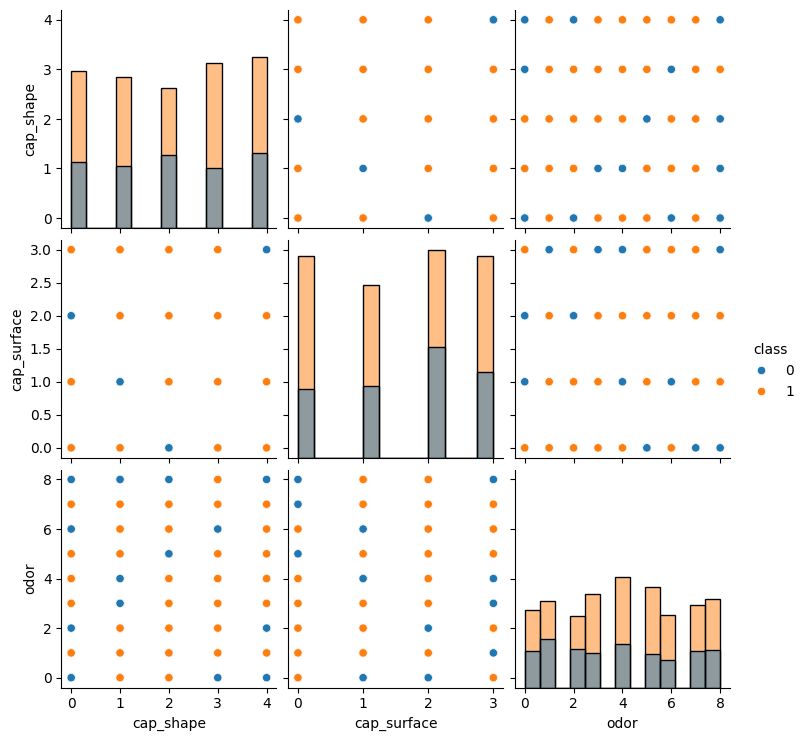

In [14]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of columns for the pairplot (including the target variable 'class')
sample_cols = ['cap_shape', 'cap_surface', 'odor', 'class']

# Encode only the subset columns
le = LabelEncoder()
df_encoded_subset = df[sample_cols].apply(le.fit_transform)

sns.pairplot(df_encoded_subset, hue='class', diag_kind='hist')
plt.show()

Task 4: SVM Implementation

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [16]:
# Basic SVM with RBF kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


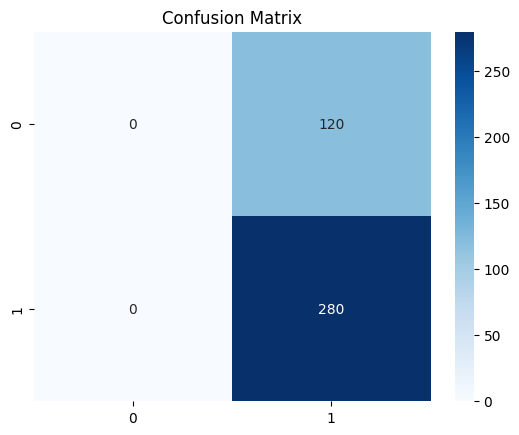

In [17]:
# Predictions
y_pred = svm_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Task 5: Visualization of SVM Results

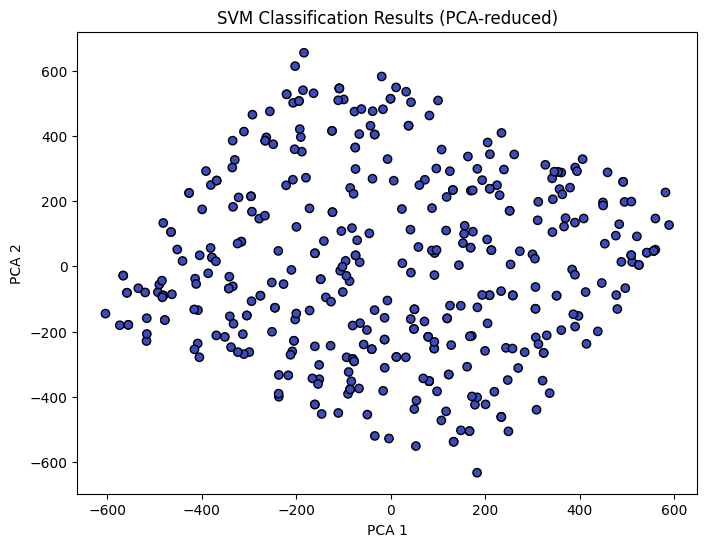

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.title("SVM Classification Results (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Task 6: Parameter Tuning & Optimization
python



In [23]:
from sklearn.model_selection import GridSearchCV



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [26]:


# Convert categorical variables to numerical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}


In [28]:



from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'kernel': 'poly', 'degree': 4, 'C': 0.1}
Best Score: 0.7081250000000001


In [30]:
# Create a new model with the best parameters
best_model = SVC(**random_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model:", accuracy)

Accuracy of the best model: 0.6675


Task 7: Comparison & Analysis

In [32]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    # Use best C and degree from random search for poly kernel if k is poly, otherwise use best C
    if k == 'poly':
      model = SVC(kernel=k, C=random_search.best_params_['C'], degree=random_search.best_params_['degree'], gamma='scale')
    else:
      model = SVC(kernel=k, C=random_search.best_params_['C'], gamma='scale')

    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    print(f"Kernel: {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred_k))
    print(classification_report(y_test, y_pred_k))
    print("-"*40)

Kernel: linear
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

----------------------------------------
Kernel: poly
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Kernel: rbf
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
